In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
filename = "conversion_data.csv"
dataframe = pd.read_csv(filename)
dataframe.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [4]:
dataframe.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [5]:
#data cleaning: remove outliers: 
dataframe.loc[dataframe.age>=110,:]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [6]:
dataframe = dataframe.loc[dataframe.age < 110,:]

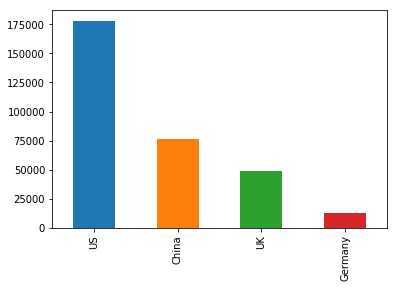

In [7]:
#start with some EDA:
#first just one variable:
country_dist = dataframe.country.value_counts()

country_dist.plot(kind="bar")

In [8]:
convert_by_country_dist = dataframe.groupby("country")["converted"].mean()
convert_by_country_dist

country
China      0.001332
Germany    0.062428
UK         0.052612
US         0.037801
Name: converted, dtype: float64

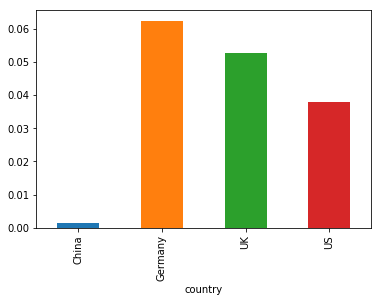

In [9]:
convert_by_country_dist.plot(kind="bar")

In [ ]:
#some insights from the above graphs:
#a great amout of users are from china, but its conversion right is very low

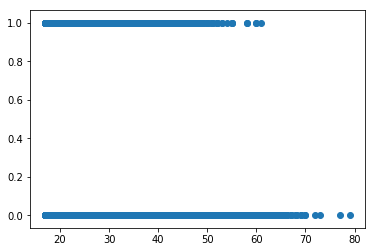

In [10]:
#to inspect age's association with coversion:
plt.scatter(dataframe.age,dataframe.converted)

In [ ]:
#of those who converted, there are very few people who are aged 70 or above

In [25]:
#to fit a model, use One-Hot-Encoding method to recode all the categorical variables:
new_df = dataframe.loc[:,('country', 'age', 'new_user', 'source', 'total_pages_visited')]
new_df = pd.get_dummies(X)
new_df.describe(),new_df.head()

(                 age       new_user  total_pages_visited  country_China  \
 count  316198.000000  316198.000000        316198.000000  316198.000000   
 mean       30.569311       0.685469             4.872918       0.242260   
 std         8.268958       0.464329             3.341053       0.428451   
 min        17.000000       0.000000             1.000000       0.000000   
 25%        24.000000       0.000000             2.000000       0.000000   
 50%        30.000000       1.000000             4.000000       0.000000   
 75%        36.000000       1.000000             7.000000       0.000000   
 max        79.000000       1.000000            29.000000       1.000000   
 
        country_Germany     country_UK     country_US     source_Ads  \
 count    316198.000000  316198.000000  316198.000000  316198.000000   
 mean          0.041287       0.153224       0.563229       0.280644   
 std           0.198955       0.360203       0.495987       0.449314   
 min           0.000000   

In [21]:
y = dataframe.converted

In [22]:
y.mean()

0.03225194340255157

In [24]:
#splite the data into training and testing datasets:

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.5)

In [26]:
ytrain.mean(),ytest.mean()

(0.032991986034067264, 0.03151190077103587)

In [27]:
#Logistic Regression for Classification: 
logReg = LogisticRegressionCV(Cs = np.logspace(-3,3,7),
                            dual=False,
                            scoring='roc_auc',
                            max_iter=1000,
                            n_jobs=-1,
                            verbose=1)
logReg.fit(Xtrain,ytrain)

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.6s finished


LogisticRegressionCV(Cs=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
           class_weight=None, cv=None, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=1000, multi_class='ovr',
           n_jobs=-1, penalty='l2', random_state=None, refit=True,
           scoring='roc_auc', solver='lbfgs', tol=0.0001, verbose=1)

In [28]:
ytest_predict = logReg.predict(Xtest)

In [30]:
print (classification_report(y_true=ytest,y_pred=ytest_predict))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    153117
          1       0.85      0.69      0.76      4982

avg / total       0.99      0.99      0.99    158099



In [34]:
#find the importances of variables:

importances = pd.DataFrame({"name":Xtrain.columns,"coef":logReg.coef_[0]})
importances['importances'] = np.abs( importances['coef'] )
importances.sort_values(by="importances",inplace=True,ascending=False)
importances

,coef,name,importances
3,-2.556499,country_China,2.556499
1,-1.703626,new_user,1.703626
4,1.154952,country_Germany,1.154952
5,0.788046,country_UK,0.788046
2,0.765690,total_pages_visited,0.765690
6,0.473240,country_US,0.473240
8,-0.187988,source_Direct,0.187988
0,-0.077045,age,0.077045
7,0.047317,source_Ads,0.047317
9,0.000409,source_Seo,0.000409


In [ ]:
# From the above importance table, it's obvious that country china is an important
#predictor. the newer a user is, the less likely she/he will convert. Customer
#loyalty is important. 